In [1]:
import pandas as pd

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt

# NLTK nos ayuda a la tokenización y la depuración de StopWords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Israel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

In [2]:
tweets = pd.read_csv('TweetsOscares2021.csv',dtype={'created_at': float,
 'date': object,
 'geo': object,
 'hashtags': object,
 'hour': object,
 'id': object,
 'name': object,
 'nlikes': int,
 'nreplies': int,
 'nretweets': int,
 'place': object,
 'retweet': bool,
 'search': object,
 'tweet': object,
 'user_id_str': object,
 'user_rt': object,
 'user_rt_id': object,
 'username': object,
 'tweet_se': object,
 'menciones': object,
 'tweet_sm': object,
 'tweet_limpio': object,
 'sentimiento': float,
 'year': int,
 'month': int,
 'day': int,
 'fecha': object,
 'Calif': object},low_memory=False)

## CLasificamos dependiendo del valor de sentimiento con esta función
def clasif(a):
    if a < 1/3:
        return("Negativo")
    elif a < 2/3:
        return("Neutral")
    else:
        return ("Positivo")

if 'Calif' not in tweets.columns:
    tweets['Calif'] = tweets['sentimiento'].apply( lambda i: clasif(i))
    
if 'fecha' not in tweets.columns:
    tweets['fecha']= pd.DatetimeIndex(tweets['date']).date
    
if 'year' not in tweets.columns:
    tweets['year']= pd.DatetimeIndex(tweets['date']).year
    
if 'month' not in tweets.columns:
    tweets['month']= pd.DatetimeIndex(tweets['date']).month

tweets['Pos']= tweets['Calif'].apply(lambda x: 1 if x=='Positivo' else 0)

tweets['Neg']= tweets['Calif'].apply(lambda x: 1 if x=='Negativo' else 0)

tweets['Neu']= tweets['Calif'].apply(lambda x: 1 if x=='Neutral' else 0)


### Tokenización

In [3]:
stp_wrds= ['á','é','í','ó','ú']
stp_wrds.extend( stopwords.words('spanish'))
tkn_stp =[]
for a, b in tweets.iterrows():
    try:
        #tkn_stp.append([c for c in b['tweet_limpio'].split() if c.isalpha() and c not in stopwords.words('spanish')])
        tkn_stp.append([c for c in b['tweet_limpio'].split() if c.isalpha() and c not in stp_wrds])
    except:
        tkn_stp.append("")

In [4]:
tweets['tkn_stp']= tkn_stp

In [5]:

freqNeg = nltk.FreqDist( [ab  for q,r in tweets[tweets.Calif =='Negativo'].iterrows() for ab in r['tkn_stp']] )

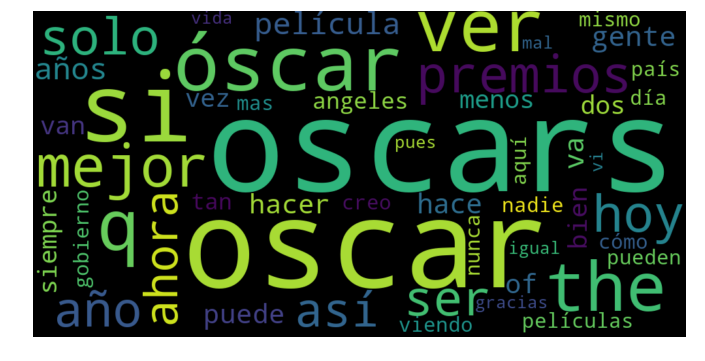

In [6]:
wordcloud = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="black").fit_words(freqNeg)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

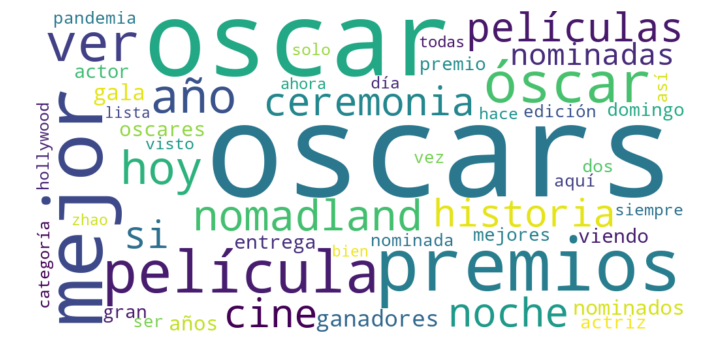

In [44]:
freqPos = nltk.FreqDist( [ab  for q,r in tweets[tweets.Calif =='Positivo'].iterrows() for ab in r['tkn_stp']] )


wordcloud = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="white").fit_words(freqPos)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

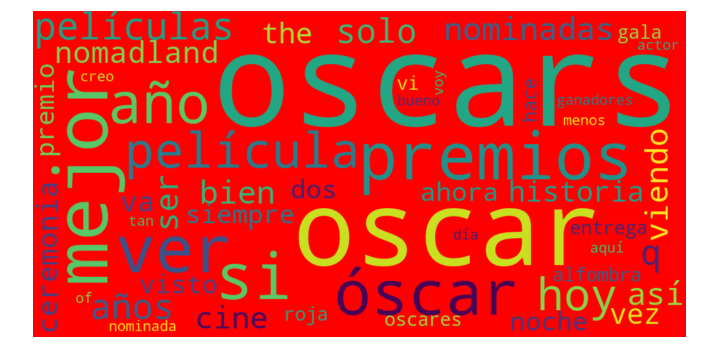

In [48]:
freqNeu = nltk.FreqDist( [ab  for q,r in tweets[tweets.Calif =='Neutral'].iterrows() for ab in r['tkn_stp']] )


wordcloud = WordCloud(width=1000, height=500,max_font_size=200, max_words=50, background_color="red").fit_words(freqNeu)
# De una cadena de texto...
# WordCloud.generate(Prom_lem)

# Display the generated image:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [8]:
tweets

created_at                 date  geo  \
0       1.619632e+12  2021-04-28 12:52:45  NaN   
1       1.619632e+12  2021-04-28 12:52:44  NaN   
2       1.619632e+12  2021-04-28 12:52:33  NaN   
3       1.619632e+12  2021-04-28 12:52:27  NaN   
4       1.619632e+12  2021-04-28 12:52:16  NaN   
5       1.619632e+12  2021-04-28 12:52:04  NaN   
6       1.619632e+12  2021-04-28 12:52:04  NaN   
7       1.619632e+12  2021-04-28 12:52:02  NaN   
8       1.619632e+12  2021-04-28 12:51:56  NaN   
9       1.619632e+12  2021-04-28 12:51:52  NaN   
10      1.619632e+12  2021-04-28 12:51:35  NaN   
11      1.619632e+12  2021-04-28 12:51:31  NaN   
12      1.619632e+12  2021-04-28 12:51:20  NaN   
13      1.619632e+12  2021-04-28 12:51:13  NaN   
14      1.619632e+12  2021-04-28 12:51:05  NaN   
15      1.619632e+12  2021-04-28 12:50:57  NaN   
16      1.619632e+12  2021-04-28 12:50:54  NaN   
17      1.619632e+12  2021-04-28 12:50:45  NaN   
18      1.619632e+12  2021-04-28 12:50:36  NaN   
19      1.619632e+12  2021-04-28 12:50:18  NaN   
20      1.619632e+12  2021-04-28 12:50:00  NaN   
21      1.619632e+12  2021-04-28 12:49:56  NaN   
22      1.619632e+12  2021-04-28 12:49:54  NaN   
23      1.619632e+12  2021-04-28 12:49:51  NaN   
24      1.619632e+12  2021-04-28 12:49:47  NaN   
25      1.619632e+12  2021-04-28 12:49:43  NaN   
26      1.619632e+12  2021-04-28 12:49:42  NaN   
27      1.619632e+12  2021-04-28 12:49:36  NaN   
28      1.619632e+12  2021-04-28 12:49:34  NaN   
29      1.619632e+12  2021-04-28 12:49:32  NaN   
...              ...                  ...  ...   
187236  1.617236e+12  2021-03-31 18:18:59  NaN   
187237  1.617236e+12  2021-03-31 18:18:15  NaN   
187238  1.617236e+12  2021-03-31 18:17:55  NaN   
187239  1.617236e+12  2021-03-31 18:17:40  NaN   
187240  1.617236e+12  2021-03-31 18:17:25  NaN   
187241  1.617236e+12  2021-03-31 18:16:12  NaN   
187242  1.617236e+12  2021-03-31 18:16:05  NaN   
187243  1.617236e+12  2021-03-31 18:16:01  NaN   
187244  1.617236e+12  2021-03-31 18:14:59  NaN   
187245  1.617236e+12  2021-03-31 18:14:56  NaN   
187246  1.617236e+12  2021-03-31 18:14:51  NaN   
187247  1.617236e+12  2021-03-31 18:14:46  NaN   
187248  1.617236e+12  2021-03-31 18:13:34  NaN   
187249  1.617236e+12  2021-03-31 18:13:29  NaN   
187250  1.617236e+12  2021-03-31 18:13:15  NaN   
187251  1.617236e+12  2021-03-31 18:10:00  NaN   
187252  1.617236e+12  2021-03-31 18:08:35  NaN   
187253  1.617236e+12  2021-03-31 18:07:32  NaN   
187254  1.617236e+12  2021-03-31 18:07:15  NaN   
187255  1.617236e+12  2021-03-31 18:07:06  NaN   
187256  1.617236e+12  2021-03-31 18:06:48  NaN   
187257  1.617235e+12  2021-03-31 18:04:13  NaN   
187258  1.617235e+12  2021-03-31 18:02:50  NaN   
187259  1.617235e+12  2021-03-31 18:02:38  NaN   
187260  1.617235e+12  2021-03-31 18:01:57  NaN   
187261  1.617235e+12  2021-03-31 18:00:43  NaN   
187262  1.617235e+12  2021-03-31 18:00:34  NaN   
187263  1.617235e+12  2021-03-31 18:00:12  NaN   
187264  1.617235e+12  2021-03-31 18:00:01  NaN   
187265  1.617235e+12  2021-03-31 18:00:00  NaN   

                                                 hashtags hour  \
0                                                      []   12   
1                                                      []   12   
2                                                      []   12   
3                                                      []   12   
4                                                      []   12   
5                                                      []   12   
6                                                      []   12   
7                                                      []   12   
8                                                      []   12   
9                                                      []   12   
10                                                     []   12   
11                                                     []   12   
12                                                 

In [166]:
tweets.at[66,'tweet_limpio']

'qué gran orgullo oaxaca estará presente en los juegosolímpicos con los trajes que la delegación mexicana portará en tokyo2020 a poner en alto el nombre de oaxaca y méxico'

In [24]:
tweets.dtypes

created_at      float64
date             object
geo              object
hashtags         object
hour             object
id               object
name             object
nlikes            int32
nreplies          int32
nretweets         int32
place            object
retweet            bool
search           object
tweet            object
user_id_str      object
user_rt          object
user_rt_id       object
username         object
tweet_se         object
menciones        object
tweet_sm         object
tweet_limpio     object
sentimiento     float64
Calif            object
dtype: object

In [49]:
tweets.groupby(['username'])['id'].count().sort_values(ascending=False)[:20]

username
JustSam74180579    821
swiftxweasley      334
OmarAlos           328
reina_antonio      328
lasopa_news        299
oscar_concha       294
oamadeobd          286
oscar_lauri44      275
Socarroncaz        271
Oscar_Teix         251
oscarmayerspain    241
MarioBeteta        221
Oscar_Chavira      215
FYC_Oscar          203
reformagente       196
FraseSimple        177
isabenisa          176
eldolardiario      151
arboles_magicos    151
owner402           150
Name: id, dtype: int64

In [50]:
tweets[(tweets.Calif == 'Negativo') & (tweets.month == 4) &  (tweets.year == 2021) ].groupby(['username'])['id'].count().sort_values(ascending=False)[:10]

username
JustSam74180579    814
oamadeobd          257
oscarmayerspain    238
OmarAlos           202
Socarroncaz        201
Oscar_Teix         189
oscar_concha       170
reina_antonio      146
swiftxweasley      133
oscar_lauri44      132
Name: id, dtype: int64

In [54]:
tweets[(tweets.month == 4) &  (tweets.year == 2021) & (tweets.Calif == 'Positivo')].groupby(['username'])['id'].count().sort_values(ascending=False)[:20]

username
lasopa_news        199
FraseSimple        159
eldolardiario      149
reformagente        84
reina_antonio       83
FYC_Oscar           74
TNTLA               69
eldiario            65
Milenio             64
oscar_amazing10     58
oscar_lauri44       57
la_patilla          56
CaraotaDigital      54
YoSoiTuLSR          50
DosisGeekcom        48
EonlineLatino       48
CNNEPrensa          46
diarioelheraldo     46
Tele13_Radio        45
los40mx             42
Name: id, dtype: int64

In [52]:
tweets[(tweets.month == 4) &  (tweets.year == 2021) & (tweets.Calif == 'Neutral')].groupby(['username'])['id'].count().sort_values(ascending=False)[:10]

username
swiftxweasley      162
tuitsdecarbon      134
reina_antonio       99
OmarAlos            94
oscar_lauri44       86
oscar_concha        82
MarioBeteta         78
FYC_Oscar           73
reformagente        61
arboles_magicos     54
Name: id, dtype: int64

In [58]:
for twe in list(tweets[ (tweets.month == 4) &  (tweets.year == 2021) & (tweets.username == 'szurita')].tweet):
    print(twe,'\n')

Hoy platicaré con Oscar @MarioBeteta acerca de los 50 años del álbum Sticky Fingers de los Rolling Stones y sobre la nueva versión fílmica de Amor sin barreras (West Side Story) a cargo de Steven Spielberg. Sintonicen el 103.3 FM o el 970 de AM. @Radio_Formula 

Y una mentada a @TNTLA por no regresar a tiempo de los cortes. No supe ni quién anunció a las nominadas a Mejor Actriz. #Oscars #OscarsEnTNT 

Gracias a quienes me acompañaron hasta el final esta noche. Son unos guerreros. Mañana comentaré este funeral que fue la ceremonia en mi canal de YouTube. ¡Gracias de verdad! ¡Los quiero! #Oscars 

¡Nomadland es la Mejor Película del año en los #Oscars! Gran, gran película. Es como un western, pero dirigido por una asiática. Así que, más que un Western, es un Eastern. 

Ahí viene la intensita de Viola Davis. Es una gran actriz, pero no soporto que siempre hable como si estuviera en un mitin. Le va a dar el premio humanitario Gene Herschel a Tyler Perry, uno de los peores cineastas de la 

In [56]:
operaciones ={'id':'count','nlikes':'sum' , 'nreplies':'sum', 'nretweets':'sum', 'Pos':'sum', 'Neg':'sum','Neu':'sum'   }

tweets[(tweets.month == 4) &  (tweets.year == 2021) ].groupby(['username']).agg(operaciones).sort_values(by='nreplies',ascending=False)
# & (tweets.Calif == 'Neutral')
#df.groupby('username').agg(Mean=('returns', 'mean'), Sum=('returns', 'sum'))

id  nlikes  nreplies  nretweets  Pos  Neg  Neu
username                                                        
TNTLA            111   42756      2909       8412   69   15   27
eldestapeweb      24    3094      1383        392   17    2    5
LANACION          11    1169       993        144    4    1    6
ChumelTorres       3   32622       893       1861    2    1    0
GabyMeza8         17   22854       783       1426    9    5    3
oscar_mezar       16   86834       748       5847    2    9    5
ONVentura        135    7278       734       1486    9   92   34
NetflixLAT         4   24140       700       2210    1    1    2
szurita           24   11032       600        958    9    8    7
oscarmayerspain  241     457       592        259    3  238    0
razeofficial      15    3287       506        703    5    7    3
oscar_puente_     31    6123       449       2120    6   19    6
PabloPlanovsky    27   19146       447       1854    9   14    4
cingolani_oscar   51    7374       440       2232    4   35   12
campsoscar         2   12977       417       5429    1    1    0
Cooperativa       17    8361       387        879    3    5    9
alisonmartino      3    9474       386       1441    1    2    0
JohanLozada26      4    9030       384       6179    0    2    2
OscarFernandoLp   39    3490       381        865    3   31    5
reina_antonio    328      24       369          0   83  146   99
DiarioCuervo      15    3587       360        269    2   12    1
FabricioSmolar    11    1238       351        120    0    9    2
OmarAlos         328     492       347          0   32  202   94
AsambleaSV         3      89       336         31    0    3    0
connieansaldi      7    5870       297        240    2    3    2
Oscar_Teix       251    1732       285        167   16  189   46
oscar_lauri44    275     689       283         61   57  132   86
FYC_Oscar        203    8096       281       1128   74   56   73
oscar_concha     294     997       275        202   42  170   82
ogb1995           33    1196       275        693    5   25    3
...              ...     ...       ...        ...  ...  ...  ...
RadioDocta         4       7         0          1    1    0    3
RadioDisneyLA      1     151         0         11    1    0    0
RadioCutFm        16       8         0          6    8    4    4
RadioConciert      1       0         0          0    0    0    1
RadioGuaira840     1       0         0          0    0    1    0
RadioChecheres     9      16         0          4    2    1    6
RadioCarolina      3      11         0          3    2    0    1
RadioCarigso20     1       0         0          0    1    0    0
RadioCamargo_      1       0         0          0    1    0    0
RadioCalvia        2       0         0          0    0    0    2
RadioCOCOnline     1       4         0          3    0    0    1
RadioGrafica893    1       4         0          0    1    0    0
RadioGuatapuri     1       0         0          1    0    1    0
RadioPrimavera_    1       6         0          2    0    1    0
RadioMagnifica     5       7         0          0    1    0    4
RadioPopCL         2       4         0          0    0    1    1
RadioPlayInter    11      10         0          6   11    0    0
RadioNeXX          1       0         0          0    0    1    0
RadioMasterLuj     2       1         0          0    1    0    1
RadioMas935        1       0         0          0    1    0    0
RadioMarcaAlmer    2       0         0          0    1    1    0
RadioLibrosCL      2      12         0          3    1    1    0
RadioHit923        1       0         0          0    1    0    0
RadioLibreFM       1       0         0          0    0    0    1
RadioLatina1011    1       1         0          0    1    0    0
RadioLago          3       0         0          0    2    1    0
RadioLT7           4       2         0          0    1    1    2
RadioKras          1       2         0          0    1    0    0
RadioInvox         2       0         0          0    

In [174]:
for a in tweets.at[66,'tkn_stp']:
    print(a)

gran
orgullo
oaxaca
presente
juegosolímpicos
trajes
delegación
mexicana
portará
poner
alto
nombre
oaxaca
méxico


In [11]:
for q,r in tweets[tweets.Calif =='Positivo'].iterrows():
    for ab in r['tkn_stp']:
        print(ab)

    #    print(r['tkn_stp'])

elegiste
traje
artesanal
oaxaqueño
uniforme
acompañe
deportistas
olímpicos
inauguración
deseamos
éxito
atletas
rumbo
juegos
olímpicos
highlifeolimpiadas
méxico
si
buscas
atuendo
único
elegante
visita
alguna
boutiques
high
life
revive
experiencia
fashionmagazine
menlifestyle
news
revistahombre
thehighlifeman
vestimenta
elaborada
resultó
ganadora
votación
lanzada
versión
adaptada
huipil
incluye
bordados
auténticos
hechos
tehuanas
gusta
diseño
ganador
gustó
artesanos
mexicanos
deben
orientarlos
marca
registrada
jinetien
diseños
hermoso
trabajo
uniformes
padrísimo
quiero
yaaa
belleza
vamos
méxico
bordado
harán
artesanos
oaxaqueños
tradicional
difícil
describir
historia
solo
mensaje
twitter
ciertamente
mensaje
bueno
ropa
típica
cirquero
visto
uniformes
bellísimo
uniforme
felicidades
excelente
diseño
elegante
dejar
deportivo
alegre
bordado
mano
istmo
fino
combinaciones
color
maravillosas
cómo
matizan
tonalidades
hilos
ojalá
incluyan
tocado
ornamento
istmeño
lindo
creo
charro
manejaba
concept

vuelta
prometimos
regresar
darte
nueva
experiencia
segura
personalizada
aquí
visita
boutique
cercana
disfruta
estilo
weback
staysafe
findyourperfectbrand
boutiques
newcollection
high
life
encuentras
último
marcas
masculinas
prestigio
internacional
visita
sección
editorial
fashionmagazine
menlifestyle
news
revistahombre
thehighlifeman
disfruta
calidad
boss
camisas
algodón
suaves
tacto
diseños
sutiles
mejores
momentos
casuales
compra
online
recibe
casa
bossgenerations
thisisboss
suitedbyboss
menstyle
onlineshopping
good
pierdas
mejor
experiencia
alta
moda
the
high
life
man
mantente
actualizado
último
tendencias
masculinas
conoce
fashionmagazine
menlifestyle
news
revistahombre
thehighlifeman
camina
orgullo
sneakers
negros
boss
elaborados
nylon
fibras
resistentes
desgarre
consíguelos
high
life
bossgenerations
thisisboss
suitedbyboss
menstyle
onlineshopping
dale
bienvenida
nueva
temporada
boss
ofrece
actualidad
lujo
presencia
encuentra
piezas
exclusivas
high
life
bossgenerations
thisisboss


brindarte
experiencia
memorable
presentamos
the
high
life
man
espacio
digital
exclusivo
contenido
descubrirás
cómo
ser
verdadero
hombre
cosmopolita
conócelo
triuggio
región
lombarda
italia
giovanni
canali
funda
hermano
giacomo
marca
hoy
símbolo
excelencia
madeinitaly
camisa
calderoni
outfit
único
siempre
lucirás
impecable
elaboradas
mejor
fibra
algodón
hace
sedosas
suaves
elige
encuentra
high
life
regalo
perfecto
boss
shop
now
última
hora
aprovechar
descuentos
especiales
piezas
lujo
highlife
quedes
luce
aspecto
formidable
calderoni
off
high
life
últimos
días
selecciona
prendas
cómodas
looks
relajados
off
boggimilano
shop
now
buenfin
acaba
oportunidad
perfecta
obtener
chamarra
estilo
cortavientos
boggimilano
shop
now
hoy
termina
buenfin
disfruta
trajes
sofisticados
descuento
highlife
visita
online
store
buenfin
termina
mañana
high
life
ofrece
off
marcas
internacionales
lujo
boggimilano
boss
calderoni
canali
zzega
visita
online
store
couture
línea
exclusiva
calderoni
refuerza
estilo
saco

chinos
completa
calzado
deportivo
compra
prendas
casa
calidad
exclusividad
alta
sastrería
podrás
encontrar
online
store
selecciona
prendas
vestir
aquí
sigue
disfrutando
días
sale
highlife
recibe
casa
prendas
actuales
marcas
internacionales
up
to
off
shop
now
online
renueva
clóset
elegancia
estilos
devueltaenantea
parte
nuevo
boss
consigue
chamarra
liviana
comodidad
hogar
disponible
online
adquiere
favoritos
casa
accesorios
indispensables
atuendos
exclusivos
hombre
negocios
actual
highlife
shop
online
aprovecha
oportunidad
casa
luce
look
cómodo
tomar
sol
jardín
highlife
conoce
vestimenta
elegante
ser
anticuada
crea
posibilidades
trajes
slimfit
venta
exclusiva
highlife
días
casa
opta
playeras
zzegna
disfruta
confort
estilo
moderno
shop
online
define
cada
aspecto
look
elige
sacos
calderoni
disfruta
acabados
detalles
tejidos
italianos
compra
casa
destacar
solo
necesitas
seguridad
atuendo
refleje
éxito
vida
highlife
compra
online
ermenegildo
zegna
cloth
venta
exclusiva
highlife
shop
online


modernos
disponible
boutiques
disfruta
off
prendas
highlife
calderoni
canali
zzegna
boss
sidi
conoce
consulta
términos
condiciones
trata
boss
outfit
vuelve
funcional
cabeza
pies
presentamos
totallook
supermoderno
fiestas
encuéntralo
boutiques
up
to
off
estrena
prendas
exclusivas
marcas
nacionales
internacionales
consulta
términos
condiciones
highlife
mantén
línea
definida
buen
vestir
jersey
clásico
tonalidad
oscura
irá
perfecta
compañía
traje
colores
neutros
confección
lana
virgen
sentirás
tacto
suavidad
incomparable
boss
disponible
boutiques
impón
presencia
trabajo
añadiendo
prendas
abrigadoras
atuendo
si
usas
traje
recomendamos
abrigo
contraste
vaya
juego
calzado
elijas
highlife
visita
boutique
calderoni
formalidad
engalana
obtén
apariencia
sofisticada
combinando
camisa
preferida
opciones
corbatas
exclusivas
disponible
boutiques
aunque
creas
temporada
frío
puedes
adaptar
chaleco
atuendos
formales
darás
figura
apariencia
moderna
modelos
boss
encontrarás
boutiques
highlife
visítanos
up

sencillez
accesorios
puede
resultar
invaluable
ocasiones
deseas
resaltar
sofisticación
highlife
visita
highlife
combina
elegancia
practicidad
canali
clásico
reinventado
gentleman
hoy
disponible
high
life
pantalón
azul
destaca
mostrar
elegancia
sofisticación
clásico
debes
portar
highlife
disponible
boutiques
cada
boutiques
seguridad
forjar
look
adecuado
estilo
vida
highlife
visítanos
l
s
chalecos
boss
volverán
mejor
adquisición
temporada
detalles
calidad
realmente
sorprendentes
consíguelo
highlife
evento
especial
regálate
traje
medida
telas
escoger
mejores
sastres
atenderte
madetomeasure
haz
cita
revive
premiación
losmetro
descubre
highlife
marca
preferida
hombres
estilo
conjunto
especial
aquel
aporta
elegancia
clásica
momentos
distintivos
calderoni
exclusivo
highlife
nuevas
camisas
atuendo
volverá
imprescindible
momentos
deseas
destacar
highlife
thenewcollection
visita
boutique
tejidos
zzegna
hacen
cada
prenda
ícono
sastrería
italiana
arte
blazer
lana
azul
highlife
disponible
boutiques

exclusiva
zzegna
logra
imprimir
estilo
sport
prendas
elegantes
consíguela
highlife
clásicos
nunca
pasan
moda
conoce
colección
calderoni
visítanos
dibujos
sutiles
colores
ligeros
zzegna
da
vida
prendas
casuales
siempre
llenas
calidad
consíguela
boutique
high
life
sales
boutiques
disfruta
off
extra
prendas
superexclusivas
visítanos
telas
dónde
escoger
crear
traje
medida
sencillo
imaginabas
madetomeasure
agenda
cita
diferénciate
resto
mejores
trajes
zzegna
acabados
resultado
años
esfuerzo
sastería
italiana
reconocida
nivel
mundial
visita
boutiques
highlife
camisa
cuadros
dará
tono
relajado
outfit
calderoni
disponible
boutiques
beautyessential
cuidado
piel
lleva
tres
pasos
limpiar
exfoliar
humectar
incorpóralos
rutina
grooming
piel
agradecerá
exalta
lado
sofisticado
crea
highlife
traje
cero
maestro
sastre
guiará
experiencia
multisensorial
madetomeasure
haz
cita
high
life
off
calderoni
consigue
atuendo
exclusivo
visita
boutique
polos
ido
ganando
terreno
vestimenta
formal
hombre
vuelve
look


detalles
calidad
inmejorable
boss
distingue
sofisticada
tendencia
contemporánea
disponible
highlife
reinventa
estilo
highlife
conoce
nueva
biker
dos
colores
inspirada
popart
vida
cosmopolita
grandes
ciudades
disponible
boutiques
consigue
highlife
resaltar
porte
auténtico
piezas
exclusivas
visita
boutique
pantalón
azul
destaca
mostrar
elegancia
sofisticación
clásico
debes
portar
highlife
disponible
boutiques
canali
destaca
estilo
clásico
llevado
nuevo
nivel
modernidad
lidera
boss
estilo
vida
highlife
trae
mejor
colección
encantará
visita
boutique
heredaste
mejores
virtudes
obséquiale
inolvidable
consigue
prenda
exclusiva
papá
highlife
recibe
off
segunda
visita
boutique
crea
looks
apasionantes
evoquen
nuevas
tierras
abrigo
prince
of
whales
polo
ocre
pantalón
gris
necesario
verte
elegante
estilo
canali
encuentra
highlife
concede
aspecto
majestuoso
define
excelsa
apariencia
papá
obsequia
highlife
fathersday
encuentra
perfectgift
boutiques
juega
posibilidades
pieza
exclusiva
zzegna
logra
im

exalta
lado
sofisticado
crea
highlife
traje
cero
maestro
sastre
guiará
experiencia
multisensorial
madetomeasure
haz
cita
viste
zzegna
momento
goza
atuendos
sofisticados
highlife
ubícanos
celebra
papá
grande
highlife
compra
prenda
llévate
segunda
off
happyfathersday
visita
boutique
canali
destaca
estilo
clásico
llevado
nuevo
nivel
modernidad
lidera
boss
estilo
vida
highlife
trae
mejor
colección
encantará
visita
boutique
l
s
chalecos
boss
volverán
mejor
adquisición
temporada
detalles
calidad
realmente
sorprendentes
consíguelo
highlife
zzegna
integra
colección
estilo
deportivo
dejar
lado
elegancia
calidad
cada
pieza
highlife
visítanos
disfruta
suit
elaborado
calidad
excepcional
madetomeasure
servicio
exclusivo
highlife
haz
cita
boutiques
encontrarás
mejor
canali
disfrutar
temporada
exclusivo
high
life
highlife
apuesta
temporada
atuendos
modernos
hombres
aventureros
racingbikerjacket
compone
colores
intensos
crear
looks
realmente
impactantes
disponible
boutiques
zzegna
siempre
destacado
ca

portar
looks
contemporáneos
visita
boutique
traje
c
saco
gris
queda
espectacular
paquito
q
siempre
tan
guapo
prólijo
fotos
presentas
algún
escenario
creo
q
complementa
look
gran
personalidad
q
sonrisa
aún
mejorsaluditos
joven
nuevo
canali
destaca
equilibrio
dinamismo
firmeza
clásico
llevado
nuevo
nivel
modernidad
luce
outfit
exclusivo
inigualable
camisas
alta
calidad
highlife
haz
mix
amp
match
visita
boutique
siempre
sera
ganador
paleta
colores
sofisticada
colección
zzegna
fusión
sportwear
streetwear
innovación
tecnológica
déjate
consentir
especial
pantalones
highlife
perfectos
ocasión
especial
visita
boutique
rayas
siguen
predominando
moda
actual
highlife
busca
predominen
look
moderno
hombre
popart
conoce
nuevo
colección
canali
exclusiva
boutiques
disfruta
especial
off
piezas
exquisitas
highlife
visítanos
haz
mix
amp
match
especiales
highlife
elige
paga
crea
combinación
perfecta
visita
boutique
negro
elegante
azul
tambièn
luce
genial
día
aristemo
amamos
emilio
grazie
pablo
rojo
encant

zzegna
deleita
boutiques
contamos
camisas
calvinklein
formes
look
sofisticado
exclusivo
high
life
logra
crear
estilo
propio
telas
italianas
disfruta
madetomeasure
agenda
cita
remarca
personalidad
chaqueta
zzegna
must
imperdible
temporada
autumnwinter
disponible
boutiques
high
life
composición
vanguardia
momento
elegir
estampados
diferentes
empieza
marcar
diferencia
highlife
visita
boutique
porta
pieza
única
encuentra
inspiración
deseas
zzegna
exclusivo
high
life
visita
boutiques
disfruta
nuevacolección
boss
haz
vestir
inolvidable
solo
high
life
inspirado
tonos
otoñales
outfit
volverá
imprescindible
temporada
highlife
destaca
presencia
estilo
prenda
opción
versátil
vestir
otoño
vincula
perfección
chaqueta
deportiva
zzegna
disponible
high
life
comienza
día
look
inmejorable
solo
high
life
otorga
versatilidad
buscas
autumnwinter
conoce
reinvéntate
día
día
mejores
marcas
presume
buen
gusto
canali
disponible
boutiques
demuestra
elegancia
colección
calderoni
otoño
exclusivo
high
life
concepto

masculinas
exclusivas
visítanos
sencillez
buen
gusto
siempre
clave
elegancia
reinvéntate
día
día
mejores
marcas
presume
buen
gusto
canali
disponible
boutiques
demuestra
elegancia
colección
calderoni
otoño
exclusivo
high
life
solo
high
life
encuentras
prendas
exclusivas
marcas
internacionales
haz
look
único
disponible
boutiques
high
life
concepto
elaboración
cada
prenda
digno
considerarse
obra
arte
madetomeasure
agenda
cita
prenda
básica
siempre
lista
businessman
duda
camisa
azul
highlife
disponible
boutiques
detalles
traje
tres
piezas
harán
porte
envidiable
highlife
conoce
colección
camisas
toque
dinámico
versátil
buscas
sorprender
cada
día
highlife
crea
combinación
chic
impulsa
porte
exclusividad
prendas
trajes
boss
mejor
arma
salir
victorioso
vida
disponible
boutiques
high
life
apodérate
tendencias
masculinas
nuevo
temporada
autumnwinter
highlife
conoce
colección
azul
protagonistas
temporada
añade
toque
color
outfit
highlife
disponible
boutique
inspirado
arquitectura
años
s
chaleco
h

colores
olivos
supertendencia
conoce
colección
inspírate
highlife
mejores
waistcoats
boutiques
visítanos
hombre
necesita
oxfords
resaltar
estilo
hugo
irradia
grandeza
último
calderoni
tonalidades
profundas
imprimirán
elegancia
cada
parte
figura
conoce
colección
vuelve
talla
pasos
dormir
menos
horas
evitará
padezcas
enfermedades
come
verduras
almidones
frutas
bajo
nivel
azúcar
evita
ingerir
azúcar
procesada
carbohidratos
refinados
muévete
empezar
ver
resultados
combinar
verdes
grises
dará
elegancia
look
diario
volverá
favoritos
gracias
confort
prendas
highlife
conoce
adiós
monotonía
conoce
valor
actitud
exitosa
viste
acorde
highlife
descubre
colección
luxury
and
style
encontrarás
boutiques
highlife
calderoni
disponible
boutiques
moda
cucita
addosso
exalta
presencia
detalles
remarquen
clase
cada
accesorio
fundamental
expresar
status
solo
highlife
visítanos
hoy
crear
prendas
elegantes
hombre
actual
olivo
parte
tendencias
descubre
colección
perfecciona
días
elegancia
corbata
logra
aspecto


nueva
temporada
llega
atuendos
sofisticados
cautivarán
aliento
highlife
conoce
colección
boutiques
elegancia
melodía
resuena
interior
cada
detalle
zzegna
prendas
cautivan
instante
miras
sientes
calidad
tela
exclusividad
lugar
conoce
highlife
exalta
presencia
detalles
remarquen
clase
cada
accesorio
fundamental
expresar
status
solo
highlife
visítanos
composición
elegante
traje
adapta
necesidades
caballero
moderno
hugo
atención
máxima
detalles
madetomeasure
servicio
sastrería
siempre
deseaste
agenda
cita
demuestra
personalidad
sofisticada
exclusivos
newarrivals
high
life
descubre
colección
prenda
tono
claro
complementa
manera
adecuada
objetivo
siempre
sinónimo
excelencia
highlife
encuéntralo
boutique
musthave
día
conquista
seduce
enamora
fragancia
zzegna
deleita
defining
your
essence
viste
prendas
exquisitas
lograr
impacto
deseas
highlife
encuéntralo
boutiques
concepto
elaboración
cada
prenda
digno
considerar
obra
artedescubre
madetomeasure
perfección
hecha
medida
agenda
cita
cazadora
pre

madetomeasure
tradición
estilo
precisión
obtiene
increíble
experiencia
sartorial
agenda
cita
exalta
presencia
detalles
remarquen
clase
cada
accesorio
fundamental
expresar
status
solo
highlife
visítanos
verdadero
hombre
necesita
suit
adapte
perfección
madetomeasure
haz
cita
muestra
distinguido
estilo
reloj
pulsera
deportivo
correa
cuero
relieve
cocodrilo
acero
inoxidable
hugo
viste
trendy
moda
looks
exclusivos
high
life
off
adicional
podrás
resistir
visítanos
musthave
día
conquista
seduce
enamora
fragancia
zzegna
deleita
adopta
stripedblazer
rayas
anchas
in
wildlyinspired
disponible
boutiques
prenda
tono
claro
complementa
manera
adecuada
objetivo
siempre
sinónimo
excelencia
highlife
wildlyinspired
encuéntralo
boutique
saletime
off
adicional
sacos
funcionales
moda
crear
muchas
combinaciones
highlife
visita
boutuque
defining
your
essence
viste
prendas
exquisitas
lograr
impacto
deseas
wildlyinspired
highlife
encuéntralo
boutiques
cazadora
prenda
elegante
incondicional
perfecta
regalar
mes


boutiques
high
life
musthave
día
conquista
seduce
enamora
fragancia
zzegna
deleita
empieza
portar
estilo
mundial
exclusivos
poquetsquare
highlife
visítanos
highlife
encontrarás
shirts
especiales
viste
elegant
menswear
temporada
wildlyinspired
disponible
boutiques
madetomeasure
confección
exclusiva
otorga
prendas
aspecto
notable
detalles
únicos
agenda
cita
clase
personalidad
deberá
presente
prendas
utilices
highlife
wildlyinspired
encuéntralo
boutique
regala
papá
lujo
comodidad
perfectgift
encuentra
boutiques
fathersday
highlife
visítanos
porte
auténtico
puede
lograr
botas
cuero
hechas
mano
increíbles
atuendo
casual
hugoboss
lleva
poquetsquare
jornada
mundialista
anota
gol
estilo
dentro
cancha
highlife
disponible
boutiques
cada
piezas
complementen
imagen
debe
tener
estilo
único
inigualable
highlife
wildlyinspired
encuéntralo
boutique
adopta
stripedblazer
rayas
anchas
in
wildlyinspired
disponible
boutiques
perfil
natural
clase
playeras
polo
highlife
must
papá
regala
estilo
fathersday
vis

honor
trendysuit
muestra
porte
moderno
blazer
único
wildlyinspired
highlife
disponible
boutiques
highlife
tonalidades
cortes
modernos
envolverán
figura
trendsformen
wildlyinspired
encuéntralo
boutiques
zapatos
monk
correa
buen
complemento
polishedstyle
highlife
happy
weekend
elige
look
versátil
distinguido
highlife
visítanos
the
must
in
your
wardrobe
usa
solo
pantalones
exclusivos
resalten
silueta
maneras
inimaginables
hugo
disponible
boutiques
highlife
cazadora
prenda
elegante
incondicional
perfecta
regalar
mes
zzegna
defining
your
essence
viste
prendas
exquisitas
lograr
impacto
deseas
wildlyinspired
highlife
encuéntralo
boutiques
elige
combinaciones
dignas
modern
gentleman
imprégnate
style
highlife
descubre
colección
boutiques
reinvéntate
día
día
mejores
marcas
mundo
combinando
estilos
texturas
actuales
hugoboss
destaca
prendas
vestir
exquisitas
vest
azul
cruzado
botones
cuadros
jaspeados
disponible
boutique
highlife
disfruta
mejor
experiencia
sartorial
suit
hecho
madetomeasure
comie

elegante
camisa
print
polka
dot
detallada
sutil
design
cuello
italiano
puños
redondeados
wildlyinspired
encuéntrala
boutique
highlife
crea
aspecto
dinámico
contemporáneo
selección
pantalones
perfectos
temporada
wildlyinspired
highlife
tonalidades
claras
must
primavera
contrasta
calzado
cinturón
cafés
colores
camisas
llamativos
highlife
zzegna
presenta
colores
tendencia
hacerte
lucir
espectacular
día
día
refresca
estilo
tendencias
cálidas
texturas
vibrantes
llegado
highlife
elegancia
construye
así
traje
perfecto
solo
madetomeasure
agenda
cita
corazón
deseamos
cumpla
metas
rodeado
alegría
highlife
felicita
día
tan
especial
hlambassadors
hombre
necesita
oxfords
resaltar
estilo
hugoboss
colorblocking
camisa
convertirá
preferido
atuendos
highlife
live
wildlyinspired
nueva
colección
highlife
centra
tema
natural
sofisticado
hombre
moderno
hoy
día
descúbrela
refinado
traje
ideal
evento
formal
matutino
hugoboss
hecho
materiales
selectos
pantalón
esencial
crear
estilo
sofisticado
hugoboss
elegan

perfectos
hombre
necesita
mantener
apariencia
impecable
día
zzegna
goza
majestuosas
mancuernillas
plata
rosa
fina
chapadas
oro
zzegna
new
collection
temporada
inspírate
colores
vibrantes
deja
selectas
prendas
lleven
nivel
highlife
visítanos
mocasines
convertirán
complemento
indispensable
vestir
pues
cómodos
elegantes
canali
aspecto
highfashion
camisa
azul
cuadros
crea
efecto
dinámico
contemporáneo
hombre
hoy
highlife
composición
elegante
traje
adapta
necesidades
caballero
moderno
hugoboss
luce
elegante
momento
camisas
highlife
presume
imagen
sofisticada
crea
atuendo
ideal
silueta
hugoboss
descubre
boutiques
estilo
silvestre
hombre
desea
prendas
exclusivas
springsummer
solo
highlife
conoce
rodeado
paisaje
paradisíaco
experiencia
lujo
bora
bora
mejores
opciones
relajarte
vacaciones
caminar
nunca
estilo
hugoboss
detalles
sutiles
marcan
completo
diferencia
hugoboss
confección
impecable
cada
prenda
elaborada
acorde
necesidades
medidas
gustos
cada
cliente
disfruta
madetomeasure
combinación
p

traje
adapta
necesidades
caballero
moderno
hugoboss
musthave
día
detalles
elegantes
proporcionan
excelencia
sublime
vive
moda
highlife
promociones
destacadas
ofrecemos
caballero
trajes
cavalli
encuentra
prendas
boutique
preferida
luce
elegante
momento
camisas
highlife
expón
estilo
refinado
selectos
sacos
highlife
presume
exquisito
porte
musthave
día
botines
café
oscuro
suela
cuero
zzegna
highlife
off
viste
tendencias
masculinas
exclusivas
conoce
caminar
nunca
estilo
hugoboss
lleva
elegancia
hugoboss
siguiente
nivel
cinturón
úsalo
vestimenta
casual
formal
atrévete
jugar
colores
corbata
llenarán
vida
estilo
atuendohighlife
visítanos
felicitaciones
incomparable
cumpleaños
gracias
aportes
arquitectónicos
highlife
hlambassadors
detalles
sutiles
marcan
completo
diferencia
hugoboss
dale
elegancia
clase
estilo
visita
boutique
cercana
llévate
mejor
prendas
selectas
caballero
highlife
ubícanos
además
ser
excelente
actor
presume
elegancia
eventos
especiales
hlambassador
presume
imagen
sofisticada

queremos
sigas
estilo
elegante
aprovecha
ofertas
disponibles
highlife
conoce
golfr
presentan
adrenalina
portando
sofisticados
looks
highlife
hlambassadors
winterfavorites
accesorio
lujosa
bufanda
suave
cachemira
complemento
ideal
ocasión
inolvidable
canali
oportunidad
perfecta
conseguir
traje
exactamente
hecho
medida
medida
haz
cita
invitamos
disfrutar
mejores
tiendas
centro
comercial
tipo
outlet
grande
latinoamérica
amig
invitamos
disfrutar
mejores
tiendas
centro
comercial
tipo
outlet
grande
latinoamérica
amig
invitamos
disfrutar
mejores
tiendas
centro
comercial
tipo
outlet
grande
latinoamérica
amig
invitamos
disfrutar
mejores
tiendas
centro
comercial
tipo
outlet
grande
latinoamérica
demuestra
exquisito
gusto
caracteriza
acude
cita
maestros
sastres
crear
cero
traje
ideal
madetomeasure
agenda
cita
embajador
encantó
obsequio
año
lleno
éxitos
profesionales
exquisito
gusto
highlife
hlambassadors
musthave
día
detalles
elegantes
proporcionan
excelencia
sublime
luce
elegante
momento
camisas


In [19]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

In [9]:
tweets.to_csv('Oscares_final.csv',index='False', encoding='utf-8-sig')